In [ ]:
# Scaling Function Testing

initial_weights [0.e+00 1.e-12 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03
 1.e-02 1.e-01 2.e-01 3.e-01 4.e-01 5.e-01 6.e-01 7.e-01 8.e-01 9.e-01
 1.e+00]
Rescaled [1.00000000e+00 1.01000000e+00 2.00000000e+00 1.10000000e+01
 1.01000000e+02 1.00100000e+03 1.00010000e+04 1.00001000e+05
 1.00000100e+06 1.00000010e+07 1.00000001e+08 1.00000000e+09
 2.00000000e+09 3.00000000e+09 4.00000000e+09 5.00000000e+09
 6.00000000e+09 7.00000000e+09 8.00000000e+09 9.00000000e+09
 1.00000000e+10]
Exponentially rescaled [1.00000000e+00 1.00033918e+00 1.03391828e+00 1.33918274e+00
 4.39182754e+00 3.49182830e+01 3.40183593e+02 3.39291225e+03
 3.39277555e+04 3.40033117e+05 3.47805524e+06 4.40070133e+07
 1.16562311e+08 2.36185772e+08 4.33411518e+08 7.58581801e+08
 1.29469696e+09 2.17860143e+09 3.63591354e+09 6.03861500e+09
 1.00000000e+10]


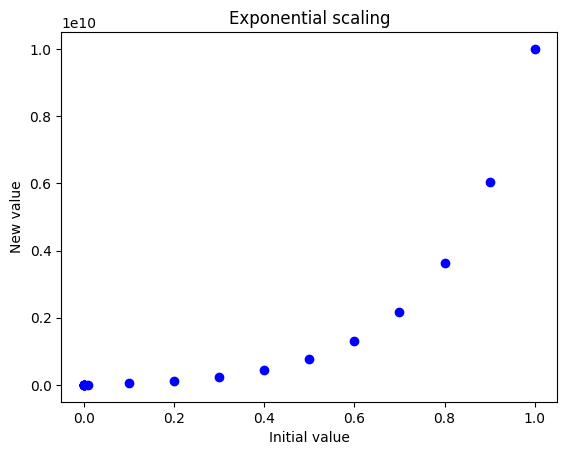

In [35]:
""" Want to map from [0, max] to [1, max * O(max-0)] 

i.e. if it were [1.e-10, 1], then [1, 1.e10].
So need to do:

weight = weight + eps, then map to [1, 1*(1/eps)]
From here, can manipulate to be non-linear.

For domains where [a, b], do
eps = 1-a  # Ensures min value of weight = 1
weight = weight + eps
[a, b] -> [1, 1*(1/eps)]
Rescale to favour 


I have numbers in the range [1, c], where c can be as large as 1.e10. 
I'd like to exponentially rescale [1, c] to [1, q], where q is a user-specified number <= 1.e10. 
"""
import numpy as np
import matplotlib.pyplot as plt


def rescale(x):
    """
    Application of the first, affine transformation ensures the relative magnitude 
    between all numbers, large and small, is preserved by the transformation.
    Addition of eps ensures all values are finite, mapping 0. -> 1.
    
    :param x: 
    :return: 
    """
    # Minimum difference in two numbers to preserve
    eps = 1.e-10
    scale = 1. / eps 
    # Adding eps 
    x = (x + eps) * scale
    return x
    

def exponential_rescale(arr, c, q, k=5):
    # Apply exponential scaling
    scaled = 1 + (q - 1) * (np.exp(k * (arr - 1) / (c - 1)) - 1) / (np.exp(k) - 1)
    return scaled


# Combines the two operations above
def weight_scaling(x, x_max, y_max, k=5):
    """
    Reservoir algorithm expects weights >= 1.
    
    This function initially linearly scales all inputs by 1/eps, where eps is a small
    number, such that the relative differences between all numbers in the range [eps, 1.]
    are preserved.
    A translation of +1 is also performed, such that it ensures all values are finite,
    mapping 0. -> 1.
    Finally, the affine-transformed values are exponentially scaled, such that there is
    a greater relative spacing between large numbers, compared to smaller relative spacings
    between small numbers. This is beneficial for selecting points associated with large weights 
    when performed weighted random sampling.  
        
    This function implements that the minimum of the input scale is always zero, and the minimum 
    output value is always one.
    
    :param x: Input values to scale. Assumed to be >=0.
    :param x_max: Max value of the input
    :param y_max: Max value of the scaled values
    :return: scaled: Scaled values
    """
    eps = 1.e-10
    # Affine transformation
    x_scaled = (x / eps) + 1
    # Max input value, following initial transformation
    x_max_scaled = (x_max / eps) + 1
    scaled = 1 + (y_max - 1) * (np.exp(k * (x_scaled - 1) / (x_max_scaled - 1)) - 1) / (np.exp(k) - 1)
    return scaled
    

# Initial weights, with a min of 0, max of 1, and more values between 0.1 and 1.0, such that 
# the plot looks better
initial_weights = np.array([0., 1.e-12, 1.e-10, 1.e-9, 1.e-8, 1.e-7, 1.e-6, 1.e-5, 1.e-4, 1.e-3, 1.e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
print('initial_weights', initial_weights)

x = rescale(initial_weights)
print('Rescaled', x)

new_x = exponential_rescale(x, (np.amax(initial_weights) / 1.e-10) + 1, 1.e10, k=5)
print('Exponentially rescaled', new_x)

new_x2 = weight_scaling(initial_weights, 1., 1.e10, k=5)
# print('Exponentially rescaled2', new_x2)

assert np.allclose(new_x, new_x2), 'Expect same functionality as running the two scaling functions consecutively'

plt.plot(initial_weights, new_x, 'bo')
plt.xlabel('Initial value')
plt.ylabel('New value')
plt.title("Exponential scaling")
plt.show()


Confirm `weight_scaling` combines `rescale` and `exponential_rescale` correctly
Same operation, but the max weight is 1.e-4. Which one might find in an domain of lower density
Rescaled [1.000000e+00 1.010000e+00 2.000000e+00 1.100000e+01 1.010000e+02
 1.001000e+03 1.000100e+04 1.000010e+05 2.000010e+05 3.000010e+05
 4.000010e+05 5.000010e+05 6.000010e+05 7.000010e+05 8.000010e+05
 9.000010e+05 1.000001e+06]
Exponentially rescaled [1.00000000e+00 4.39183093e+00 3.40183932e+02 3.39291564e+03
 3.39277894e+04 3.40033458e+05 3.47805881e+06 4.40070692e+07
 1.16562495e+08 2.36186228e+08 4.33412521e+08 7.58583867e+08
 1.29470105e+09 2.17860930e+09 3.63592835e+09 6.03864247e+09
 1.00000503e+10]
Exponentially rescaled2 [1.00000000e+00 4.39183093e+00 3.40183932e+02 3.39291564e+03
 3.39277894e+04 3.40033458e+05 3.47805881e+06 4.40070692e+07
 1.16562495e+08 2.36186228e+08 4.33412521e+08 7.58583867e+08
 1.29470105e+09 2.17860930e+09 3.63592835e+09 6.03864247e+09
 1.00000503e+10]


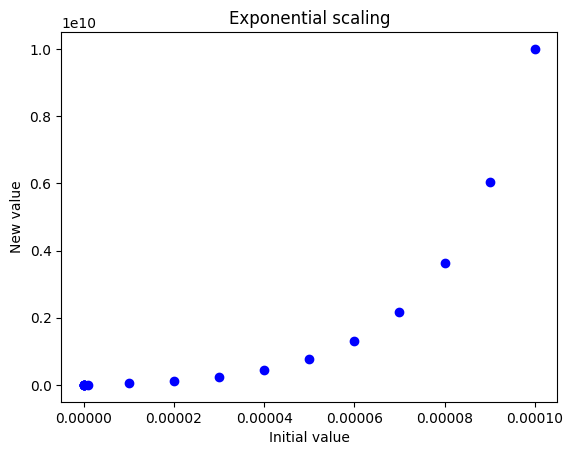

In [37]:
"""Same operation, but on weights with a lower max"""

print("Confirm `weight_scaling` combines `rescale` and `exponential_rescale` correctly")
print('Same operation, but the max weight is 1.e-4. Which one might find in an domain of lower density')
initial_weights = np.array([0., 1.e-12, 1.e-10, 1.e-9, 1.e-8, 1.e-7, 1.e-6, 1.e-5, 2.e-5, 3.e-5, 4.e-5, 5.e-5, 6.e-5, 7.e-5, 8.e-5, 9.e-5, 1.e-4])

x = rescale(initial_weights)
print('Rescaled', x)

# Note, c is determined from (x_max + eps / eps)
new_x = exponential_rescale(x, 1.e6, 1.e10, k=5)
print('Exponentially rescaled', new_x)

new_x2 = weight_scaling(initial_weights, 1.e-4, 1.e10, k=5)
print('Exponentially rescaled2', new_x)

assert np.allclose(new_x, new_x2), 'Expect same functionality as running the two scaling functions consecutively'


plt.plot(initial_weights, new_x, 'bo')
plt.xlabel('Initial value')
plt.ylabel('New value')
plt.title("Exponential scaling")
plt.show()

